In [31]:
from numpy import *
import pylab as p

%matplotlib inline

In [32]:
# Definition of parameters
a = 1.0
b = 0.1
c = 1.5
d = 0.75

In [33]:
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1],
                  -c*X[1] + d*b*X[0]*X[1] ])

In [34]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2))

True

In [35]:
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [36]:
A_f0 = d2X_dt2(X_f0) 
A_f1 = d2X_dt2(X_f1)  

# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1)

In [37]:
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)

In [38]:
from scipy import integrate

In [39]:
# time
t = linspace(0, 15,  1000) 

In [40]:
# initial conditions: 10 rabbits and 5 foxes
X0 = array([10, 5])
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

/Users/gabrielus/.pyenv/versions/3.5.1/envs/scipy/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


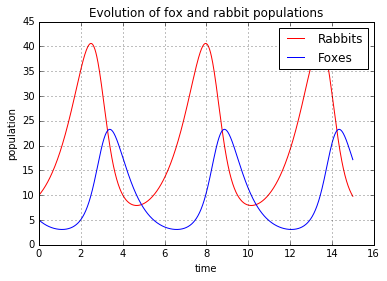

In [41]:
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.show()
f1.savefig('rabbits_and_foxes_1.png')